<a href="https://colab.research.google.com/github/apolloadeniran/Assignment/blob/main/Peacehep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hepc = pd.read_csv('/content/sample_data/HepatitisCdata.csv')

np.random.seed(0)


In [7]:
hepc.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
hepc.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,3=Cirrhosis,59,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


In [15]:
#get the number of missing data points per column
missing_values_count = hepc.isnull().sum()


# look at the # of missing points in the first ten columns
missing_values_count[0:5]

,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,1


In [18]:
missing_values = hepc.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(hepc)) * 100


# Display the summary


In [19]:
# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})




In [21]:
missing_data_summary

,Missing Values,Percentage
Unnamed: 0,0,0.000000
Category,0,0.000000
Age,0,0.000000
Sex,0,0.000000
ALB,1,0.162602
ALP,18,2.926829
ALT,1,0.162602
AST,0,0.000000
BIL,0,0.000000
CHE,0,0.000000


Graphical representation of the missing values

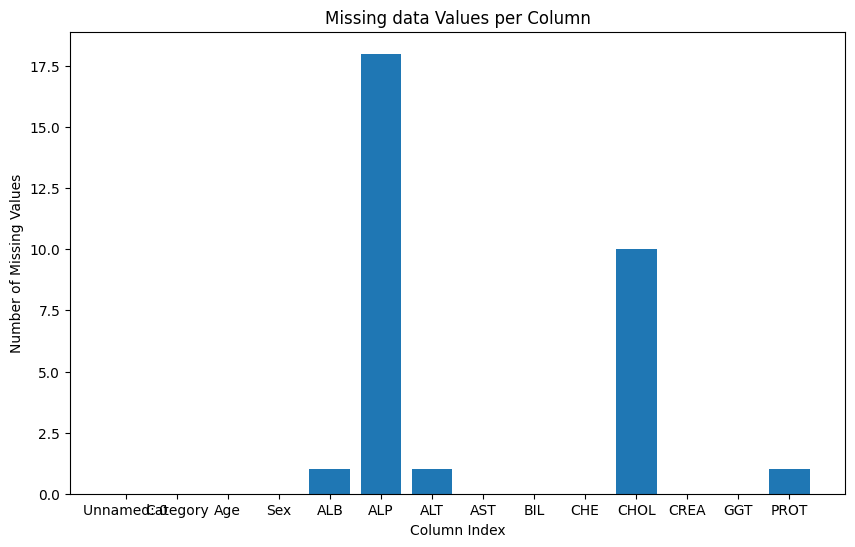

In [22]:
# prompt: Using dataframe missing_data_summary: matplotlib

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(missing_data_summary.index, missing_data_summary['Missing Values'])
plt.xlabel("Column Index")  # Assuming index represents columns
plt.ylabel("Number of Missing Values")
plt.title("Missing data Values per Column")
plt.show()

###Dropping and filling the missing values

In [24]:
# prompt: generate code to drop and fill the missing value

# Drop columns with more than 50% missing values
threshold = 0.5
hepatitis_c_data = hepc.dropna(thresh=len(hepc) * threshold, axis=1)

# Fill remaining missing values with the most frequent value in each column
for col in hepatitis_c_data.columns:
  if hepatitis_c_data[col].isnull().any():
    most_frequent_value = hepatitis_c_data[col].mode()[0]  # Get the most frequent value
    hepatitis_c_data[col].fillna(most_frequent_value, inplace=True)


#Verify if there are any more missing values
missing_values_after_filling = hepatitis_c_data.isnull().sum()
missing_values_after_filling

<ipython-input-24-cc21375454df>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hepatitis_c_data[col].fillna(most_frequent_value, inplace=True)


,0
Unnamed: 0,0
Category,0
Age,0
Sex,0
ALB,0
ALP,0
ALT,0
AST,0
BIL,0
CHE,0


###The category of hepatitis and its count

In [25]:
hepc.Category.value_counts()

,count
Category,
0=Blood Donor,533
3=Cirrhosis,30
1=Hepatitis,24
2=Fibrosis,21
0s=suspect Blood Donor,7


In [27]:
# create Bar plot
!pip install plotly
import plotly.express as px # Import the plotly.express module and assign it to px
# create Bar plot
values = hepc.Category.unique()
values_count = hepc.Category.value_counts().to_list()
colors = ["#636EFA", "#EF553B", "#00CC96", "#AB63FA", "#d62728"]
# Create a bar chart
fig = px.bar(hepc,
            x=values,
            y= values_count,
            title= 'Cases Number by condition',
            labels={"x": "Medical Condition", "y": "Number of Cases"}
            #color = colors,
            )
# showing the plot
fig.show()
